In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X_train = pd.read_csv('data_source/X_train.csv')
X_test = pd.read_csv('data_source/X_test.csv')
y_train = pd.read_csv('data_source/y_train.csv')
y_test = pd.read_csv('data_source/y_test.csv')

In [4]:
X_train1 = X_train.iloc[:,4:]
X_train1

,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,199,94,105,2,30,1,1
1,879,126,753,2,31,1,1
2,13990,9102,4888,28,15,16,12
3,1275,300,975,6,1200,3,3
4,202,83,119,2,30,1,1
...,...,...,...,...,...,...,...
103321,142,142,0,1,0,1,0
103322,145,145,0,1,0,1,0
103323,62,62,0,1,0,1,0
103324,293,223,70,4,0,3,1


In [5]:
lst = list(X_train1.columns.values)
lst

['Bytes',
 'Bytes Sent',
 'Bytes Received',
 'Packets',
 'Elapsed Time (sec)',
 'pkts_sent',
 'pkts_received']

[2 4]


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: unsupported operand type(s) for +: 'int' and 'SelectKBest'

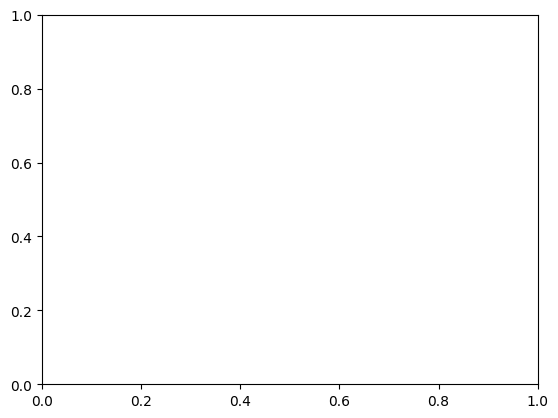

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fisher_selector = SelectKBest(score_func=f_classif, k=2)
X_new = fisher_selector.fit_transform(X_train1, y_train)
print(fisher_selector.get_support(indices=True))
plt.bar(range(len(X_new)), fisher_selector)
plt.xticks(range(len(X_new)), X_train1.feature_names, rotation=90)


In [14]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X_train1,y_train)
chi_scores

(array([1.48112109e+10, 4.14926173e+09, 1.06621012e+10, 1.50717314e+07,
        8.96191565e+06, 6.14210438e+06, 8.94148863e+06]),
 array([0., 0., 0., 0., 0., 0., 0.]))

In [15]:
p_values = pd.Series(chi_scores[1],index = X_train1.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

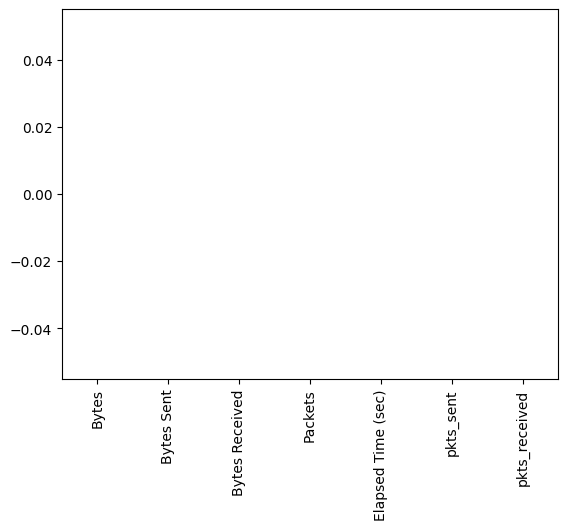

In [16]:
p_values.plot.bar()

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train1, y_train)

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=4)

In [23]:
cols = selector.get_support(indices=True)
cols

array([2, 3, 4, 6], dtype=int64)